In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import wrangle as w

### Acquire the data

In [2]:
df = w.acquire_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2017-06-26 to 2022-06-24
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JPYEN       1247 non-null   float64
 1   HKD         1247 non-null   float64
 2   CHYUAN      1247 non-null   float64
 3   KRWON       1247 non-null   float64
 4   SPD         1247 non-null   float64
 5   TWD         1247 non-null   float64
 6   THB         1247 non-null   float64
 7   USD_Index   1245 non-null   float64
 8   USD_Actual  1305 non-null   float64
dtypes: float64(9)
memory usage: 102.0 KB


In [4]:
# drop nulls as losing less than 50 values wont impact the overall observation
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2017-06-26 to 2022-06-24
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JPYEN       1244 non-null   float64
 1   HKD         1244 non-null   float64
 2   CHYUAN      1244 non-null   float64
 3   KRWON       1244 non-null   float64
 4   SPD         1244 non-null   float64
 5   TWD         1244 non-null   float64
 6   THB         1244 non-null   float64
 7   USD_Index   1244 non-null   float64
 8   USD_Actual  1244 non-null   float64
dtypes: float64(9)
memory usage: 97.2 KB


### Explore the data

#### Observing each variable against the usd from 2017-2022

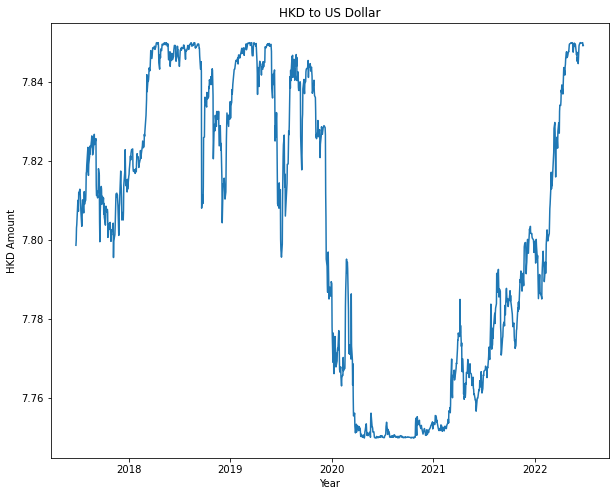

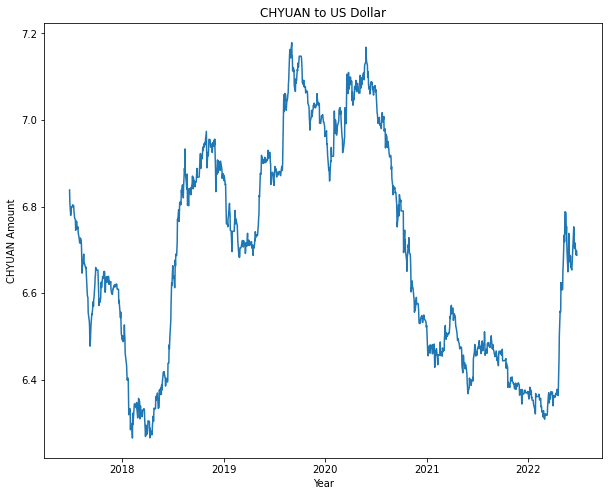

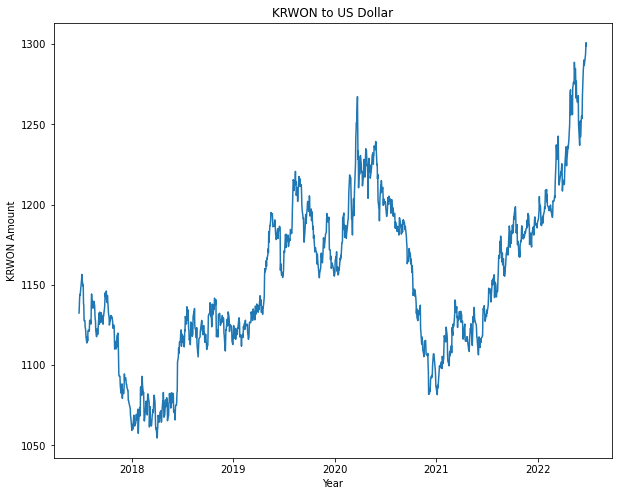

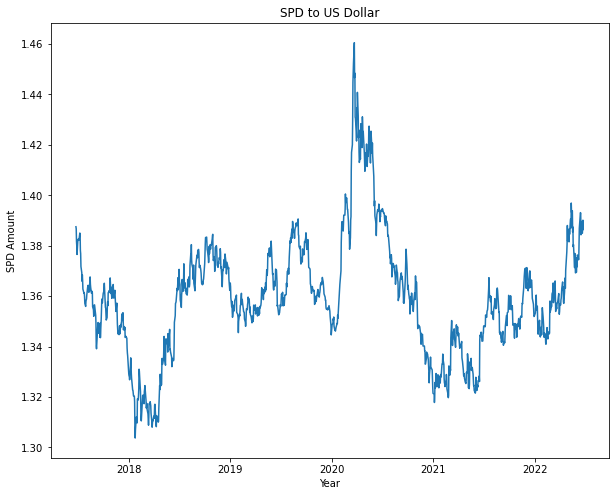

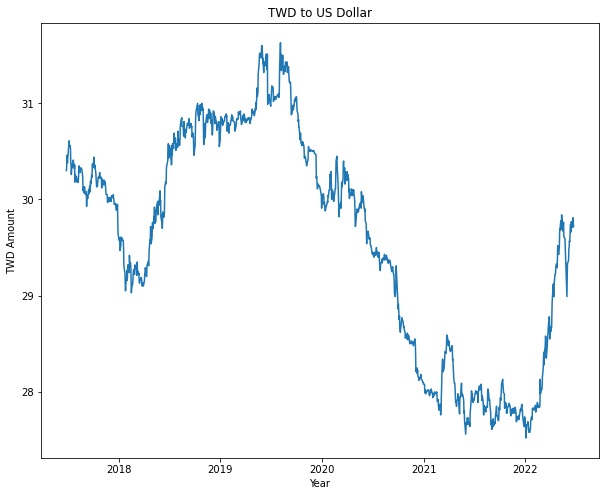

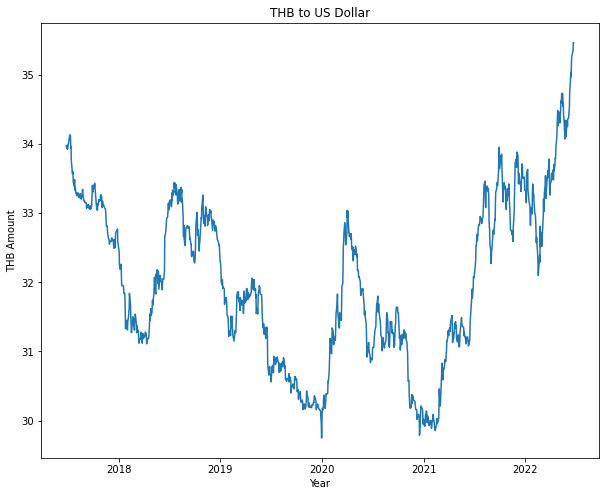

In [13]:
for col in df.columns[1:7]:
    plt.figure(figsize=(10,8))
    sns.lineplot(x='DATE', y=col, data=df)
    plt.title(f'{col} to US Dollar')
    plt.xlabel('Year')
    plt.ylabel(f'{col} Amount')
    plt.show()

### Identifying the Target Variable:
- My Target Variable is the percentage of value gained or loss when converting USD to the observed East Asian Currencies.

- I do not have that target Variable, so, it will have to be created. 

The information backing these calculations are assumptions of an exchange rate where the respective national equivalent of $1 per country observed equal exchange rates. The research done behind these calculations can be found: 
- [Korean Won](https://wise.com/us/currency-converter/krw-to-usd-rate)
- [Hong Kong Dollar](https://www.scmp.com/yp/discover/advice/article/3093224/what-hong-kong-us-dollar-peg-and-how-does-it-work)
- [Singapore Dollar](https://themoneyconverter.com/USD/SGD)
- [Chinese Yuan](https://www.cnn.com/2021/12/09/investing/china-yuan-2021-mic-intl-hnk/index.html)
- [Thai Baht](https://www.exchangerates.org.uk/USD-THB-exchange-rate-history.html)
- [Japanese Yen](https://www.bloomberg.com/news/articles/2022-06-10/why-the-yen-is-so-weak-and-what-that-means-for-japan-quicktake)

In [14]:
df['USD_YEN']= (df['JPYEN'] - 100)
df['USD_HKD'] = (df['HKD'] - 10) * 10
df['USD_YUAN'] = (df['CHYUAN'] - 10) * 10
df['USD_WON'] = (df['KRWON']/1000) * 10
df['USD_SPD'] = (df['SPD'] - 1) * 100
df['USD_TWD'] = (df['TWD'] - 30) * 10
df['USD_THB'] = (df['THB'] - 30)

## Moving forward I will be conducting a time-series analysis 

### Train/Test Split

In [15]:
train_size = 0.70 # 70% train, 30% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

In [16]:
# train data which contains 70% of the total data
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 871 entries, 2017-06-26 to 2020-12-28
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JPYEN       871 non-null    float64
 1   HKD         871 non-null    float64
 2   CHYUAN      871 non-null    float64
 3   KRWON       871 non-null    float64
 4   SPD         871 non-null    float64
 5   TWD         871 non-null    float64
 6   THB         871 non-null    float64
 7   USD_Index   871 non-null    float64
 8   USD_Actual  871 non-null    float64
 9   USD_YEN     871 non-null    float64
 10  USD_HKD     871 non-null    float64
 11  USD_YUAN    871 non-null    float64
 12  USD_WON     871 non-null    float64
 13  USD_SPD     871 non-null    float64
 14  USD_TWD     871 non-null    float64
 15  USD_THB     871 non-null    float64
dtypes: float64(16)
memory usage: 115.7 KB


In [17]:
# test data which contains the remaining 30% of the data
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 2020-12-29 to 2022-06-24
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JPYEN       373 non-null    float64
 1   HKD         373 non-null    float64
 2   CHYUAN      373 non-null    float64
 3   KRWON       373 non-null    float64
 4   SPD         373 non-null    float64
 5   TWD         373 non-null    float64
 6   THB         373 non-null    float64
 7   USD_Index   373 non-null    float64
 8   USD_Actual  373 non-null    float64
 9   USD_YEN     373 non-null    float64
 10  USD_HKD     373 non-null    float64
 11  USD_YUAN    373 non-null    float64
 12  USD_WON     373 non-null    float64
 13  USD_SPD     373 non-null    float64
 14  USD_TWD     373 non-null    float64
 15  USD_THB     373 non-null    float64
dtypes: float64(16)
memory usage: 49.5 KB


#### Visualizing Splits

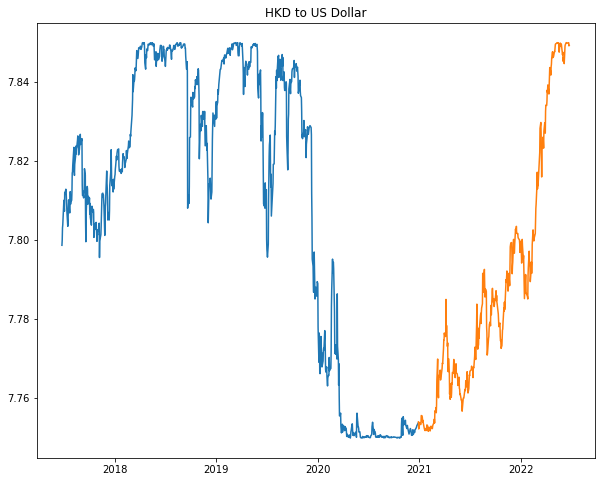

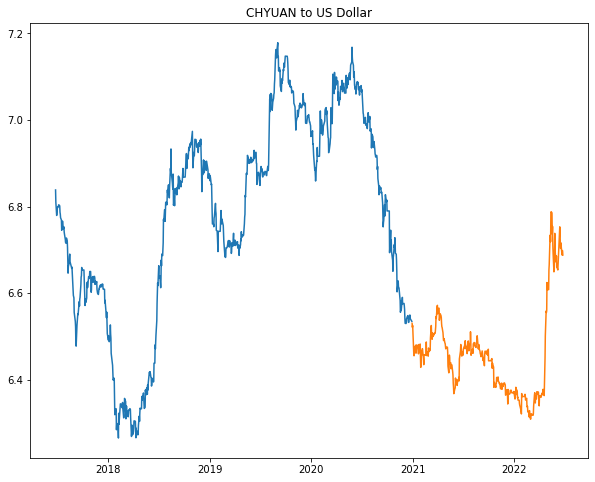

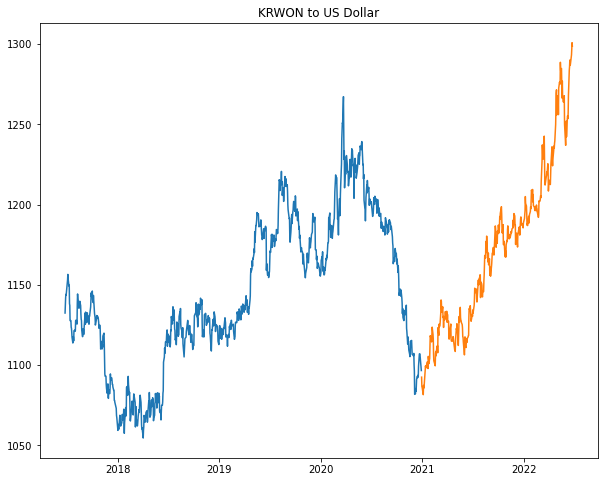

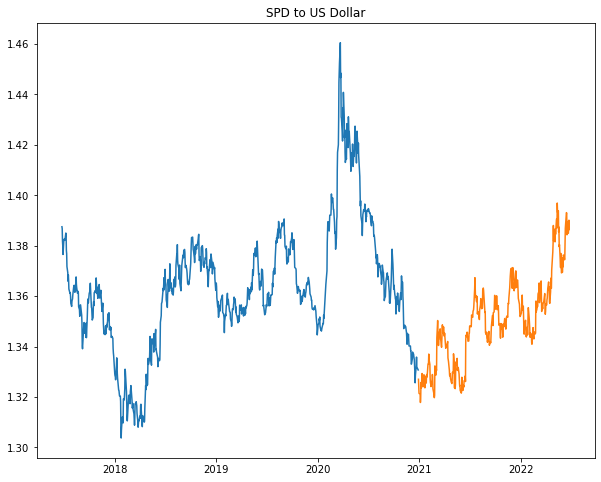

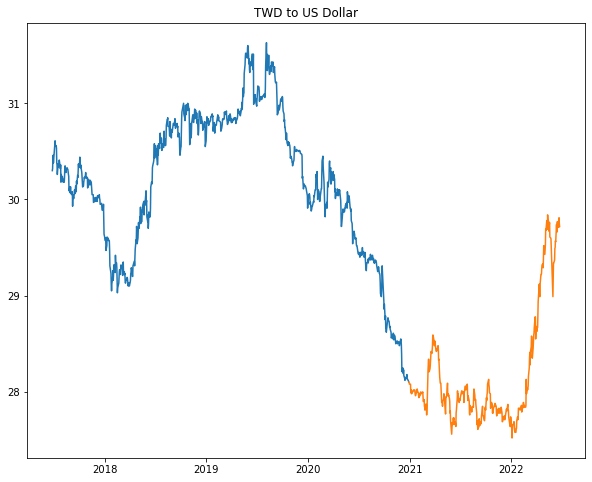

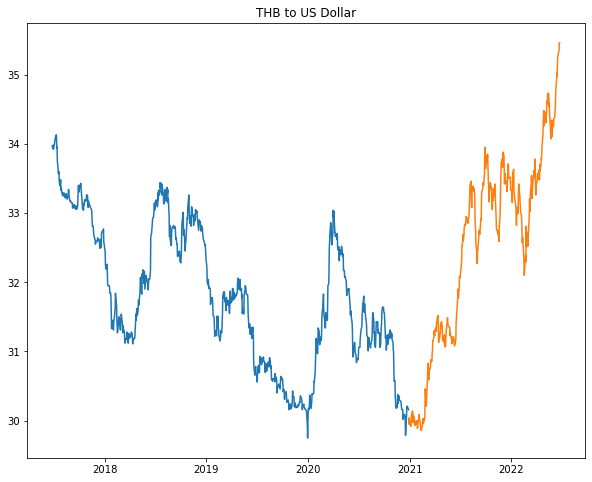

In [18]:
for col in train.columns[1:7]:
    # Japan Yen Train/Test
    plt.figure(figsize=(10,8))
    plt.title(f'{col} to US Dollar')
    plt.plot(train[col])
    plt.plot(test[col])
    plt.show()

### Creating a Month Column

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 871 entries, 2017-06-26 to 2020-12-28
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JPYEN       871 non-null    float64
 1   HKD         871 non-null    float64
 2   CHYUAN      871 non-null    float64
 3   KRWON       871 non-null    float64
 4   SPD         871 non-null    float64
 5   TWD         871 non-null    float64
 6   THB         871 non-null    float64
 7   USD_Index   871 non-null    float64
 8   USD_Actual  871 non-null    float64
 9   USD_YEN     871 non-null    float64
 10  USD_HKD     871 non-null    float64
 11  USD_YUAN    871 non-null    float64
 12  USD_WON     871 non-null    float64
 13  USD_SPD     871 non-null    float64
 14  USD_TWD     871 non-null    float64
 15  USD_THB     871 non-null    float64
dtypes: float64(16)
memory usage: 115.7 KB


In [20]:
train['month'] = train.index.strftime('%m-%b')

In [21]:
train.head()

,JPYEN,HKD,CHYUAN,KRWON,SPD,TWD,THB,USD_Index,USD_Actual,USD_YEN,USD_HKD,USD_YUAN,USD_WON,USD_SPD,USD_TWD,USD_THB,month
DATE,,,,,,,,,,,,,,,,,
2017-06-26,111.48,7.7986,6.8382,1132.48,1.3875,30.30,33.97,112.7623,1.0,11.48,-22.014,-31.618,11.3248,38.75,3.0,3.97,06-Jun
2017-06-27,112.42,7.7999,6.8100,1137.77,1.3867,30.32,33.94,112.5494,1.0,12.42,-22.001,-31.900,11.3777,38.67,3.2,3.94,06-Jun
2017-06-28,112.18,7.8030,6.7984,1141.91,1.3818,30.41,33.95,112.0744,1.0,12.18,-21.970,-32.016,11.4191,38.18,4.1,3.95,06-Jun
2017-06-29,112.32,7.8038,6.7840,1144.07,1.3799,30.46,33.98,111.9981,1.0,12.32,-21.962,-32.160,11.4407,37.99,4.6,3.98,06-Jun
2017-06-30,112.40,7.8055,6.7793,1143.75,1.3765,30.38,33.92,111.9897,1.0,12.40,-21.945,-32.207,11.4375,37.65,3.8,3.92,06-Jun


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 871 entries, 2017-06-26 to 2020-12-28
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JPYEN       871 non-null    float64
 1   HKD         871 non-null    float64
 2   CHYUAN      871 non-null    float64
 3   KRWON       871 non-null    float64
 4   SPD         871 non-null    float64
 5   TWD         871 non-null    float64
 6   THB         871 non-null    float64
 7   USD_Index   871 non-null    float64
 8   USD_Actual  871 non-null    float64
 9   USD_YEN     871 non-null    float64
 10  USD_HKD     871 non-null    float64
 11  USD_YUAN    871 non-null    float64
 12  USD_WON     871 non-null    float64
 13  USD_SPD     871 non-null    float64
 14  USD_TWD     871 non-null    float64
 15  USD_THB     871 non-null    float64
 16  month       871 non-null    object 
dtypes: float64(16), object(1)
memory usage: 122.5+ KB


# Observing Japanese Yen 

Text(0.5, 1.0, 'Pre-2021 Average USD to Japan % Gain on Conversion')

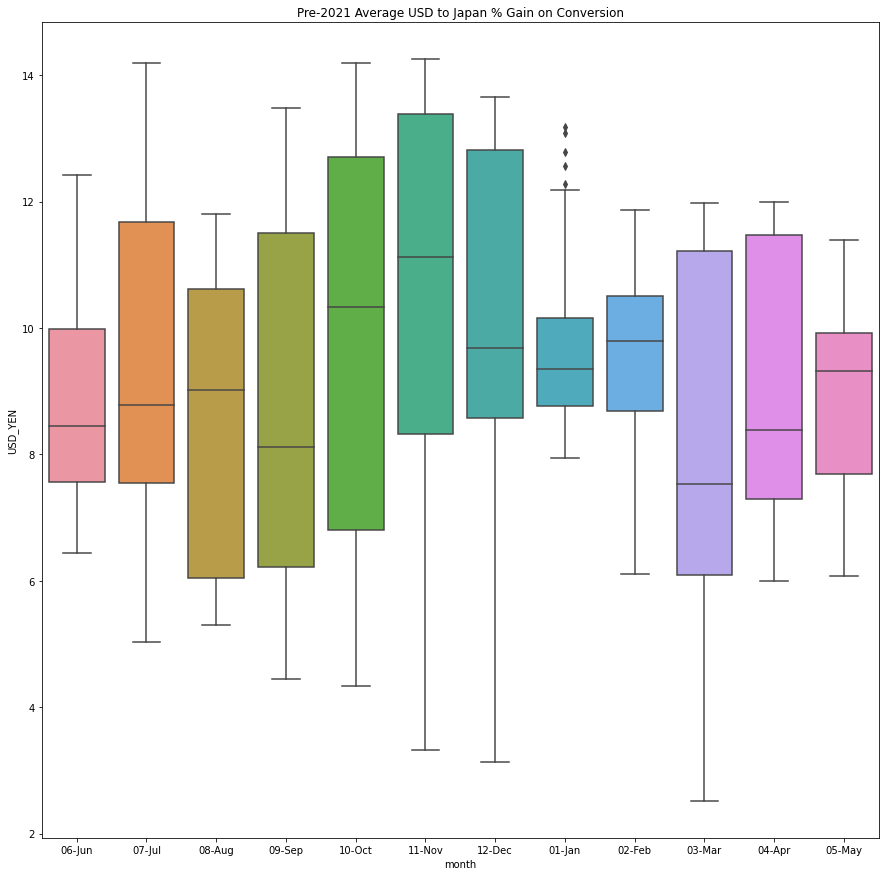

In [31]:
# boxplot for on average h currency
plt.figure(figsize=(15,15))
sns.boxplot(data=train, x='month', y='USD_YEN')
plt.title('Pre-2021 Average USD to Japan % Gain on Conversion')

In [111]:
# set y
y = train.JPYEN

<AxesSubplot:title={'center':'1 Month Average'}, xlabel=' ', ylabel='Percent(%) Change'>

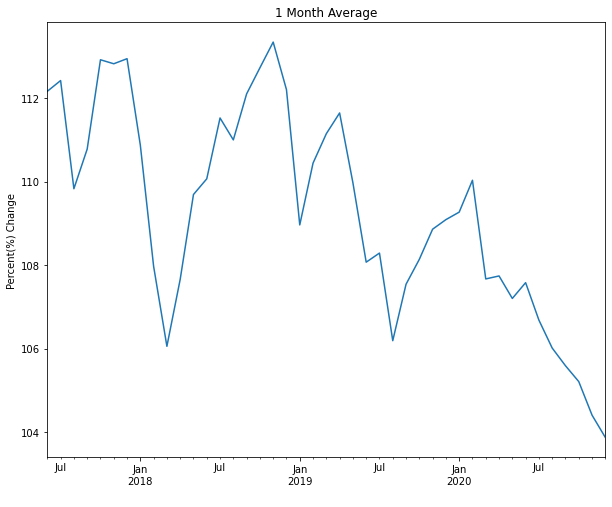

In [112]:
plt.figure(figsize=(10,8))
y.resample('1M').mean().plot(title='1 Month Average',
                                         xlabel=' ', ylabel='Percent(%) Change')

### Visualization of the changes over time of Japanese Yen in multiple frequencies

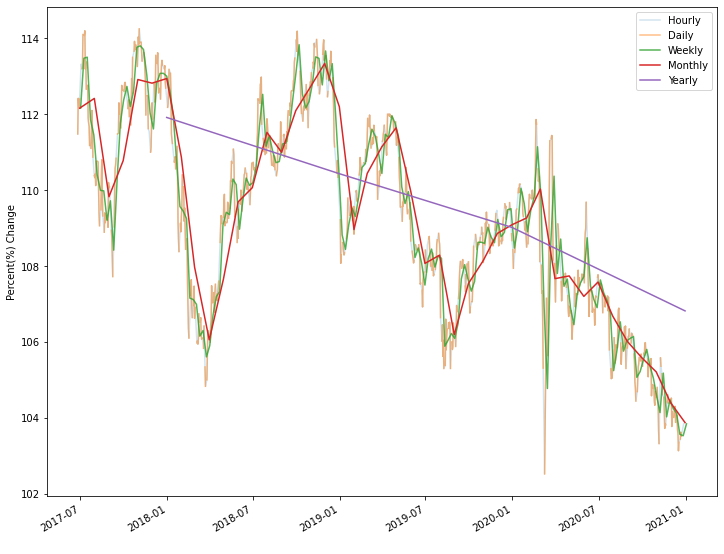

In [113]:
plt.figure(figsize=(12,10))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly',  xlabel=' ',
                                        ylabel='Percent(%) Change')
plt.legend()

### Checking Volatility :

<AxesSubplot:title={'center':'Volitility of the USD to Yen % Change Over Time'}, xlabel=' '>

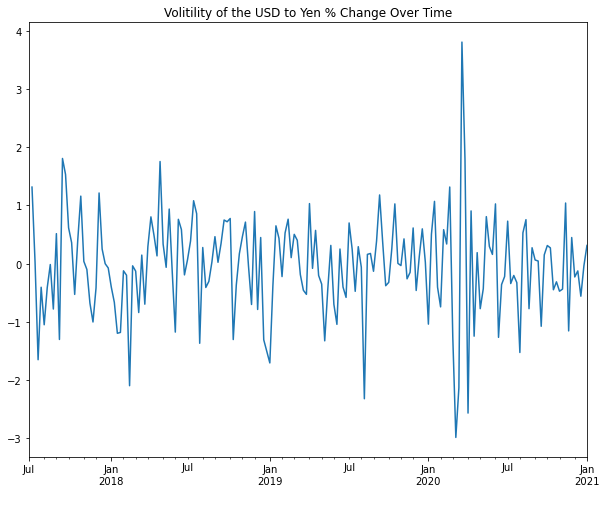

In [114]:
plt.figure(figsize=(10,8))
y.resample('W').mean().diff().plot(title='Volitility of the USD to Yen % Change Over Time', xlabel= ' ')

### Checking for seasonality with autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

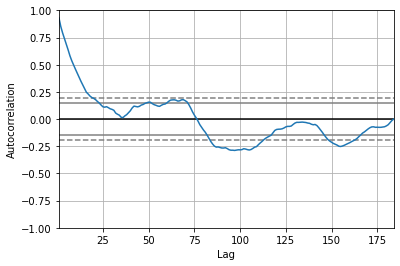

In [115]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

#### Takeaways: 
- Up until the start of 2021, the Japanese Yen was getting stronger.
- There was a steady decrease of buying power in Japan from the U.S. as in mid 2017, one could get 12% more YEN per USD spent ($1= ¥112). Gradually, the yen came close to being 1:1 
- Little to no seasonality. Some potential obervations around the 100th and 150th month but overall it's random noise.
- 2017-2020 Had strong volatility

# Observing Hong Kong Dollar

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 871 entries, 2017-06-26 to 2020-12-28
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   JPYEN       871 non-null    float64
 1   HKD         871 non-null    float64
 2   CHYUAN      871 non-null    float64
 3   KRWON       871 non-null    float64
 4   SPD         871 non-null    float64
 5   TWD         871 non-null    float64
 6   THB         871 non-null    float64
 7   USD_Index   871 non-null    float64
 8   USD_Actual  871 non-null    float64
 9   USD_YEN     871 non-null    float64
 10  USD_HKD     871 non-null    float64
 11  USD_YUAN    871 non-null    float64
 12  USD_WON     871 non-null    float64
 13  USD_SPD     871 non-null    float64
 14  USD_TWD     871 non-null    float64
 15  USD_THB     871 non-null    float64
 16  month       871 non-null    object 
dtypes: float64(16), object(1)
memory usage: 122.5+ KB


Text(0.5, 1.0, 'Pre-2021 Average USD to Hong Kong % Loss on Conversion')

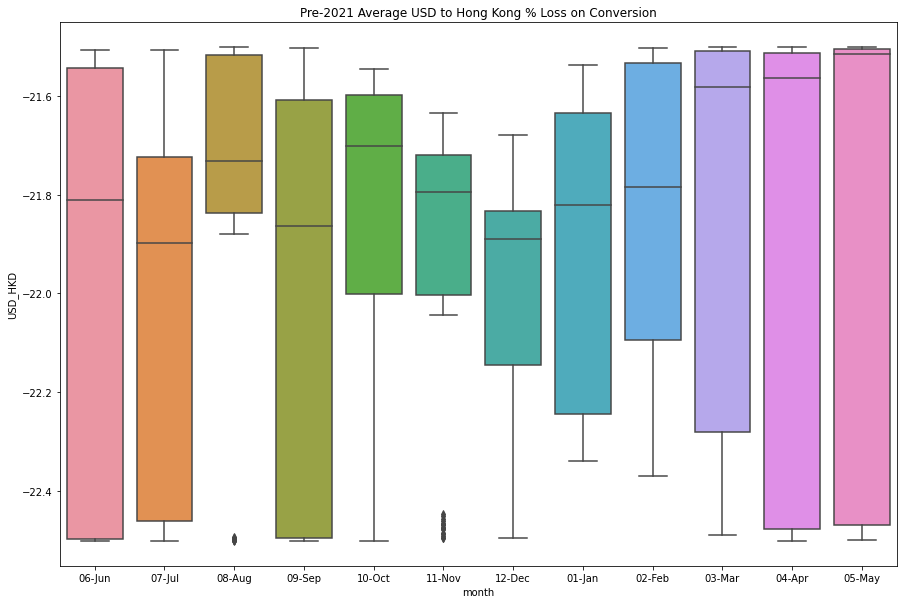

In [117]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train, x='month', y='USD_HKD')
plt.title('Pre-2021 Average USD to Hong Kong % Loss on Conversion')

### Visualization of the changes over time of Hong Kong Dollar in multiple frequencies.

In [118]:
# set y
y = train.HKD

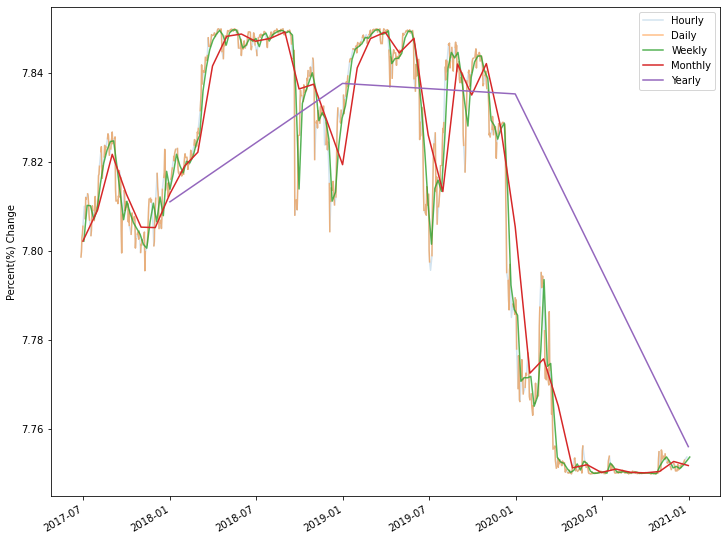

In [119]:
plt.figure(figsize=(12,10))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly',  xlabel=' ',
                                        ylabel='Percent(%) Change')
plt.legend()

### Checking Volatility:

<AxesSubplot:title={'center':'Volitility of the USD to HKD Over Time'}, xlabel=' '>

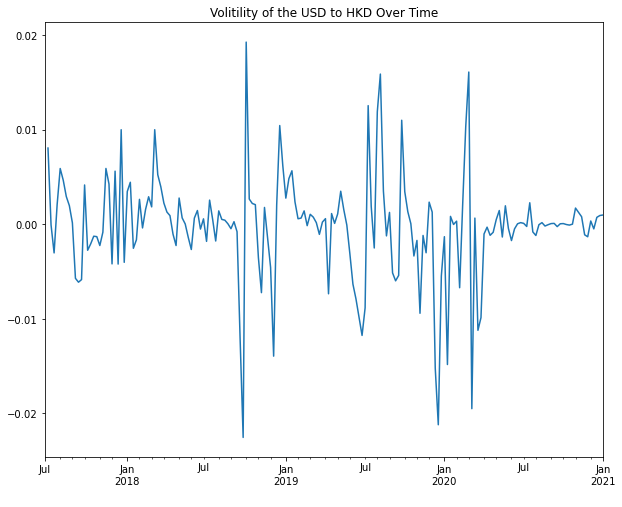

In [120]:
plt.figure(figsize=(10,8))
y.resample('W').mean().diff().plot(title='Volitility of the USD to HKD Over Time', xlabel= ' ')

### Checking for seasonaility via Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

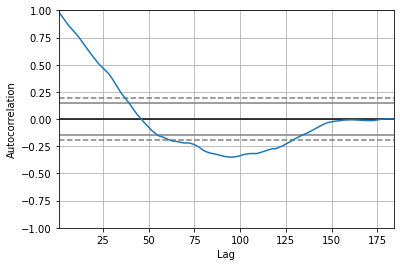

In [121]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

### Takeaway's:
- The Hong Kong Dollar, for the length of this dataset, has seemed to always have had strength against the USD. This may have to do with the peg of the HKD to the USD. 
- 10 HKD is the national equivalent to 1 USD, however as of 2021 the exchange rate is around USD $ 1 = HKD 7.76 meaning about 22% less buying power for those using the USD over HKD. 
- Little to no seasonality. There is some peaks at around 100 months, however majority of it is random noise.
- Not much volalility.

## Chinese Yuan:

Text(0.5, 1.0, 'Pre-2021 Average USD to Hong Kong % Loss on Conversion')

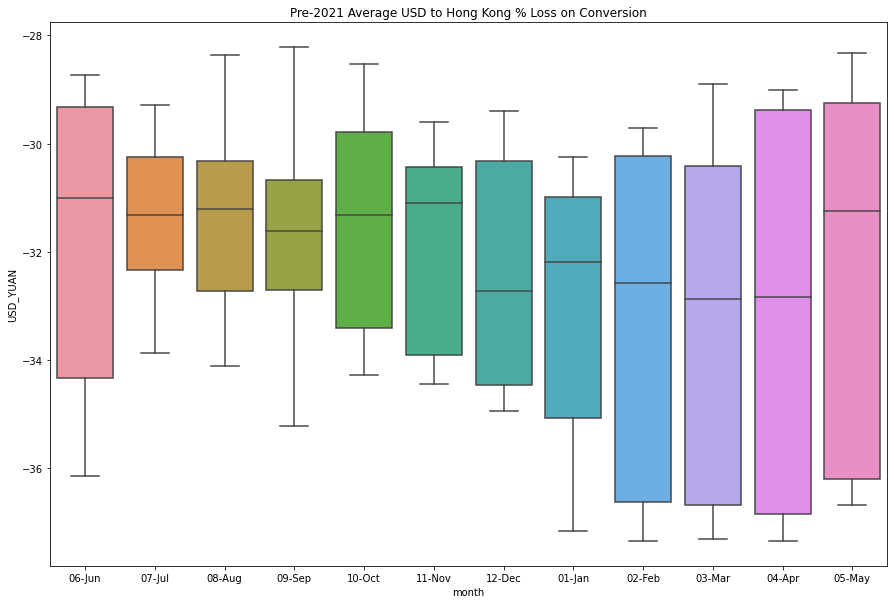

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train, x='month', y='USD_YUAN')
plt.title('Pre-2021 Average USD to Hong Kong % Loss on Conversion')

### Visualization of the changes over time of Chinese Yuan in multiple frequencies.

In [131]:
y = train.CHYUAN

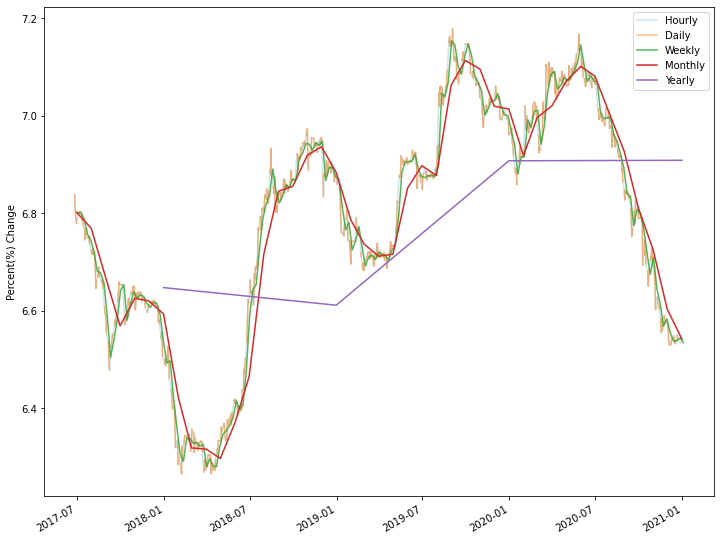

In [132]:
plt.figure(figsize=(12,10))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly',  xlabel=' ',
                                        ylabel='Percent(%) Change')
plt.legend()

### Checking Volatility: 

<AxesSubplot:title={'center':'Volitility of the USD to HKD Over Time'}, xlabel=' '>

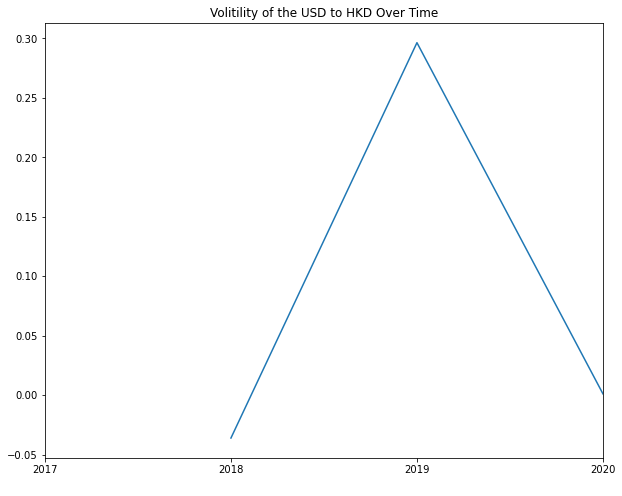

In [138]:
plt.figure(figsize=(10,8))
y.resample('Y').mean().diff().plot(title='Volitility of the USD to HKD Over Time', xlabel= ' ')

### Checking Seasonality

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

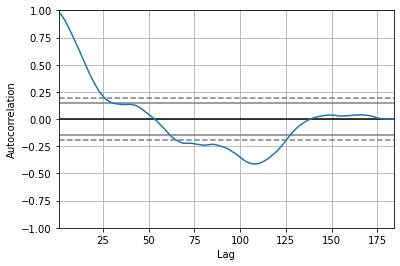

In [136]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())